### Python 实现人工神经网络

上面的内容，我们介绍了人工神经网络的构成和最重要的反向传播算法。接下来，尝试通过 Python 来实现一个神经网络运行的完整流程。


#### 定义神经网络结构

为了让推导过程足够清晰，这里我们只构建包含 1 个隐含层的人工神经网络结构。其中，输入层为 2 个神经元，隐含层为 3 个神经元，并通过输出层实现 2 分类问题的求解。该神经网络的结构如下：

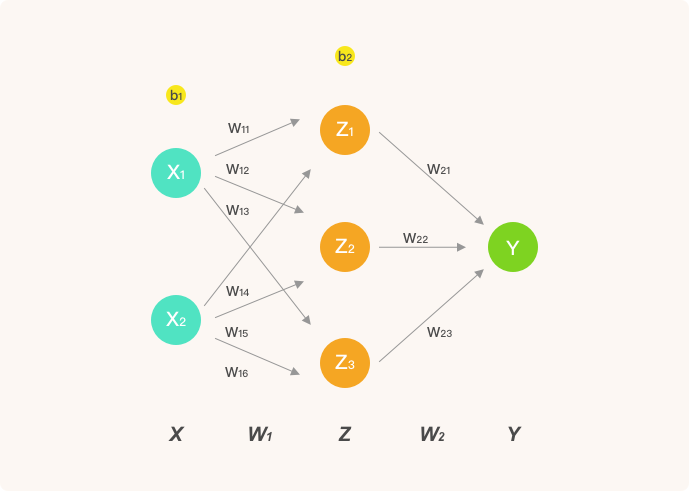

本次实验中，我们使用的激活函数为 $sigmoid$ 函数：

$$
\mathit{sigmoid}(x) = \frac{1}{1+e^{-x}}       \tag{17a}
$$

由于下面要使用 $sigmoid$ 函数的导数，所以同样将其导数公式写出来：

$$
\Delta \mathit{sigmoid}(x)  = \mathit{sigmoid}(x)(1 - \mathit{sigmoid}(x))    \tag{17b}
$$


In [1]:
## Sigmoid function

def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    
    return sigmoid(x) * (1-sigmoid(x))

### 前向传播

前向（正向）传播中，每一个神经元的计算流程为：线性变换 → 激活函数→输出值。

同时，我们约定：

- $Z$ 表示隐含层输出，$Y$ 则为输出层最终输出。
- $w_{ij}$ 表示从第 $i$ 层的第 $j$ 个权重。

于是，上图中的前向传播的代数计算过程如下。

神经网络的输入 $X$，第一层权重 $W_1$，第二层权重 $W_2$。为了演示方便，$X$ 为单样本，因为是矩阵运算，我们很容易就能扩充为多样本输入。

$$
X=\left[ \begin{array}{ll}{x_{1}} & {x_{2}}\end{array}\right] \tag{18}
$$

$$
W_{1}=\left[ \begin{array}{lll}{w_{11}} & {w_{12}} & {w_{13}} \\ {w_{14}} & {w_{15}} & {w_{16}}\end{array}\right] \tag{19}
$$

$$
W_{2}=\left[ \begin{array}{c}{w_{21}} \\ {w_{22}} \\ {w_{23}}\end{array}\right] \tag{20}
$$

接下来，计算隐含层神经元输出 $Z$（线性变换 → 激活函数）。同样，为了使计算过程足够清晰，我们这里将截距项表示为 0。

$$
Z = \mathit{sigmoid}(X \cdot W_{1}) \tag{21}
$$

最后，计算输出层 $Y$（线性变换 → 激活函数）：

$$
Y = \mathit{sigmoid}(Z \cdot W_{2}) \tag{22}
$$

In [3]:
import numpy as np
## Example

X = np.array([[1,1]])
y = np.array([[1]])

X,y

(array([[1, 1]]), array([[1]]))

然后，随机初始化隐含层权重。

In [4]:
W1 = np.random.rand(2, 3)
W2 = np.random.rand(3, 1)

W1, W2

(array([[0.33068421, 0.52371748, 0.41799144],
        [0.94563638, 0.71179062, 0.41387173]]), array([[0.32593318],
        [0.54899591],
        [0.1469163 ]]))

In [6]:
input_layer = X  # 输入层
hidden_layer = sigmoid(np.dot(input_layer, W1))  # 隐含层，公式 20
output_layer = sigmoid(np.dot(hidden_layer, W2))  # 输出层，公式 22

output_layer

array([[0.68622673]])

#### 反向传播

接下来，我们使用梯度下降法的方式来优化神经网络的参数。那么首先需要定义损失函数，然后计算损失函数关于神经网络中各层的权重的偏导数（梯度）。

此时，设神经网络的输出值为 $Y$，真实值为 $y$。然后，定义平方损失函数如下：

$$
Loss(y, Y) = \sum (y - Y)^2 \tag{23}
$$

接下来，求解梯度 $\frac{\partial Loss(y, Y)}{\partial{W_2}}$，需要使用链式求导法则：

$$
\frac{\partial Loss(y, Y)}{\partial{W_2}} = \frac{\partial Loss(y, Y)}{\partial{Y}} \frac{\partial Y}{\partial{W_2}}\tag{24a}
$$

$$
\frac{\partial Loss(y, Y)}{\partial{W_2}} = 2(Y-y) * \Delta \mathit{sigmoid}(Z \cdot W_2) \cdot Z\tag{24b}
$$

同理，梯度 $\frac{\partial Loss(y, Y)}{\partial{W_1}}$ 得：

$$
\frac{\partial Loss(y, Y)}{\partial{W_1}} = \frac{\partial Loss(y, Y)}{\partial{Y}} \frac{\partial Y }{\partial{Z}} \frac{\partial Z}{\partial{W_1}} \tag{25a}
$$

$$
\frac{\partial Loss(y, Y)}{\partial{W_1}} = 2(Y-y) * \Delta \mathit{sigmoid}(Z \cdot W_2) \cdot W_2 * \Delta \mathit{sigmoid}(X \cdot W_1) \cdot X \tag{25b}
$$

其中，$\frac{\partial Y}{\partial{W_2}}$，$\frac{\partial Y}{\partial{W_1}}$ 分别通过公式 $(22)$ 和 $(21)$ 求得。接下来，我们基于公式对反向传播过程进行代码实现。

In [7]:
# 公式 24
d_W2 = np.dot(hidden_layer.T, (2 * (output_layer - y) *
                               sigmoid_derivative(np.dot(hidden_layer, W2))))

# 公式 25
d_W1 = np.dot(input_layer.T, (
    np.dot(2 * (output_layer - y) * sigmoid_derivative(
           np.dot(hidden_layer, W2)), W2.T) * sigmoid_derivative(np.dot(input_layer, W1))))

d_W2, d_W1

(array([[-0.1056423 ],
        [-0.10469081],
        [-0.09414683]]), array([[-0.00751235, -0.01294441, -0.00419448],
        [-0.00751235, -0.01294441, -0.00419448]]))

### 现在，就可以设置学习率，并对 $W_1$, $W_2$ 进行一次更新了。

In [8]:
# 梯度下降更新权重, 学习率为 0.05

W1 -= 0.05 * d_W1  # 如果上面是 y - output_layer，则改成 +=
W2 -= 0.05 * d_W2

W2, W1

(array([[0.3312153 ],
        [0.55423045],
        [0.15162364]]), array([[0.33105983, 0.5243647 , 0.41820116],
        [0.946012  , 0.71243784, 0.41408146]]))

In [9]:
# 示例神经网络完整实现
class NeuralNetwork:

    # 初始化参数
    def __init__(self, X, y, lr):
        self.input_layer = X
        self.W1 = np.random.rand(self.input_layer.shape[1], 3)
        self.W2 = np.random.rand(3, 1)
        self.y = y
        self.lr = lr
        self.output_layer = np.zeros(self.y.shape)

    # 前向传播
    def forward(self):
        self.hidden_layer = sigmoid(np.dot(self.input_layer, self.W1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2))

    # 反向传播
    def backward(self):
        d_W2 = np.dot(self.hidden_layer.T, (2 * (self.output_layer - self.y) *
                                            sigmoid_derivative(np.dot(self.hidden_layer, self.W2))))

        d_W1 = np.dot(self.input_layer.T, (
            np.dot(2 * (self.output_layer - self.y) * sigmoid_derivative(
                   np.dot(self.hidden_layer, self.W2)), self.W2.T) * sigmoid_derivative(
                np.dot(self.input_layer, self.W1))))

        # 参数更新
        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2

### 实际例子

In [10]:
import pandas as pd

df = pd.read_csv(
    "https://labfile.oss.aliyuncs.com/courses/1081/course-12-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


In [12]:
X = df[['X0','X1']].values
y = df[['Y']].values

接下来，我们将其输入到网络中，并迭代 100 次：

final loss: 133.24398952332766


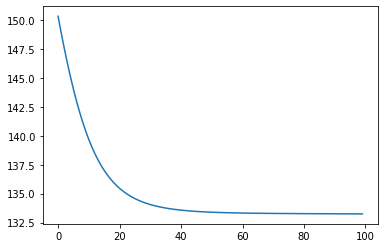

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


nn = NeuralNetwork(X, y, lr=0.001)  # 定义模型
loss_list = []  # 存放损失数值变化

for i in range(100):
    nn.forward()  # 前向传播
    nn.backward()  # 反向传播
    loss = np.sum((y - nn.output_layer)**2)  # 计算平方损失
    loss_list.append(loss)

print("final loss:", loss)
plt.plot(loss_list)  # 绘制 loss 曲线变化图

可以看到，损失函数逐渐减小并接近收敛，变化曲线比感知机计算会平滑很多。不过，由于我们去掉了截距项，且网络结构太过简单，导致收敛情况并不理想。本实验重点再于搞清楚 BP 的中间过程，准确度和学习难度不可两全。另外，需要注意的是由于权重是随机初始化，多次运行的结果会不同。

至此，我们已经完成了一个简单的人工神经网络的训练。实际上，这只是人工神经网络的冰山一角，而这种基础的简单神经网络结构往往用于真实问题的解决过程中。后面，我们将会学习更为复杂的神经网络结构，[<i class="fa fa-external-link-square" aria-hidden="true"> THE NEURAL NETWORK ZOO</i>](http://www.asimovinstitute.org/neural-network-zoo/) 这篇文章整理了大量不同类型的神经网络，相信你能从下图感受到人工神经网络的精彩世界。

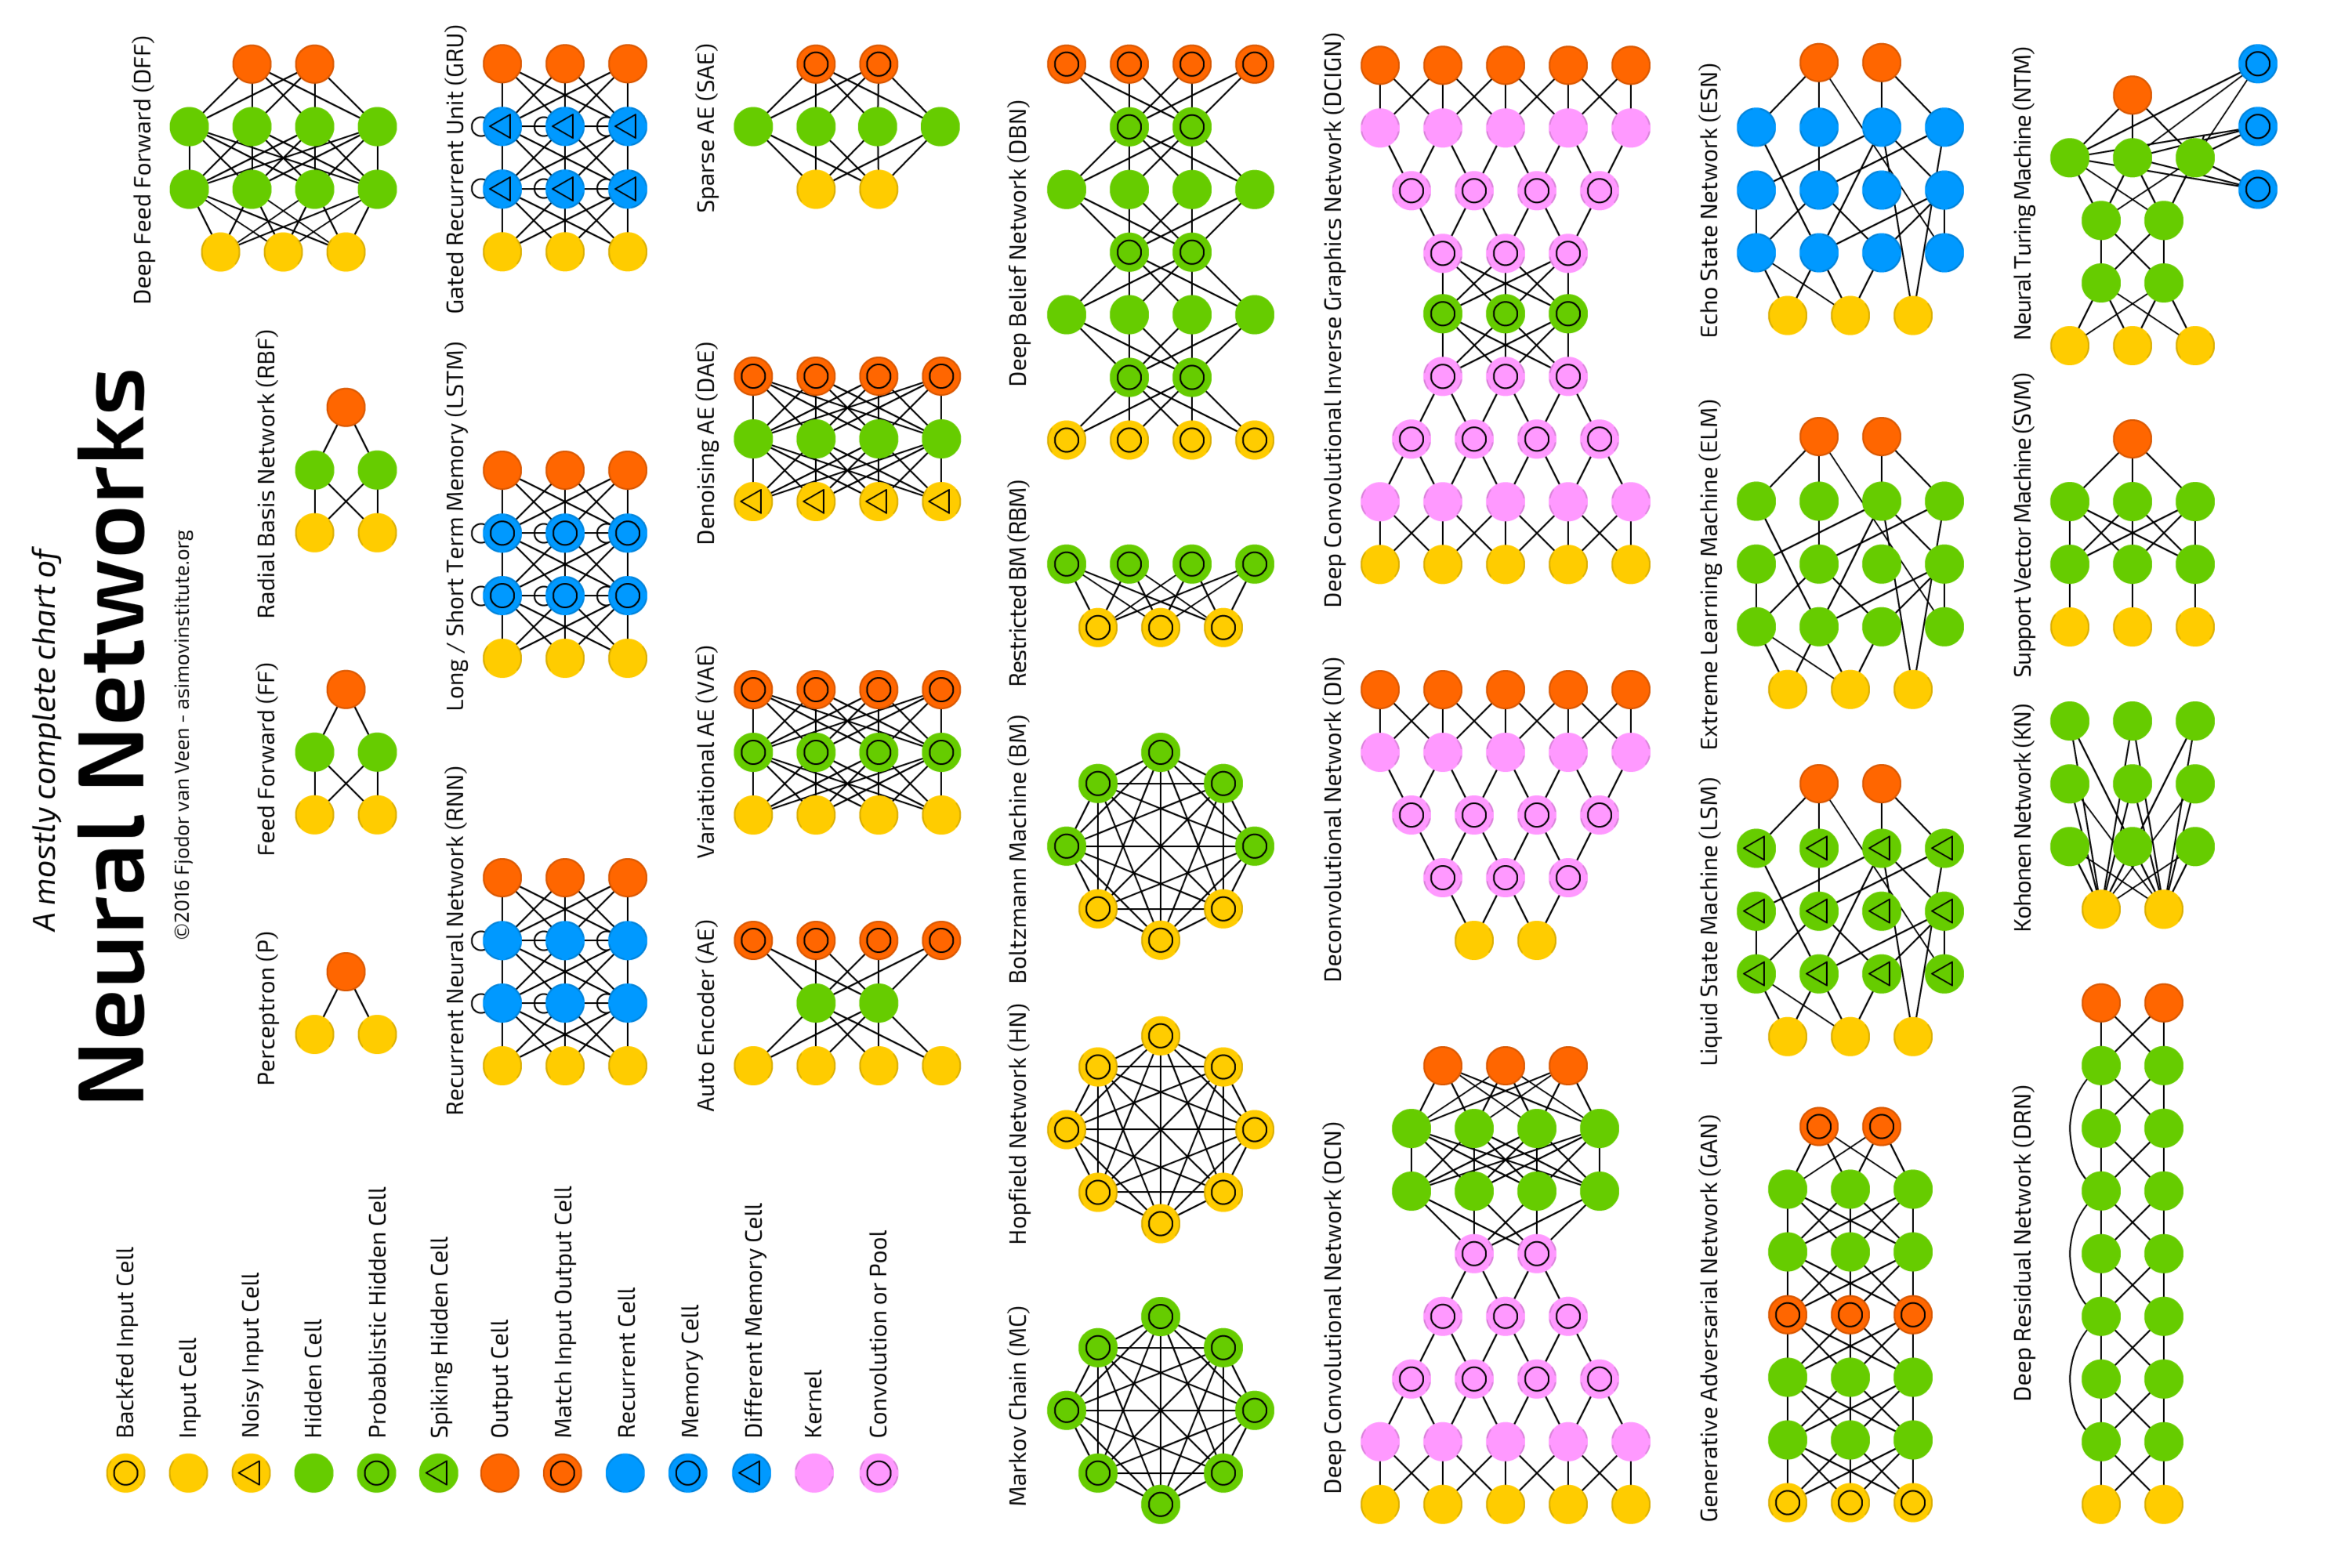

- [<i class="fa fa-video-camera" aria-hidden="true"> 人工神经网络介绍</i>](https://www.bilibili.com/video/av15532370)
- [<i class="fa fa-video-camera" aria-hidden="true"> 神经网络优化方法</i>](https://www.bilibili.com/video/av16144388)
- [<i class="fa fa-video-camera" aria-hidden="true"> 反向传播算法介绍</i>](https://www.bilibili.com/video/av16577449)
- [<i class="fa fa-video-camera" aria-hidden="true"> 反向传播算法演算</i>](https://www.bilibili.com/video/av16577449/)